In [49]:
import pandas as pd 
import matplotlib.pyplot as plt
df=pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [7]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [8]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3460 entries, 7 to 5012
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       3460 non-null   object 
 1   EdLevel       3420 non-null   object 
 2   YearsCodePro  3449 non-null   object 
 3   Employment    3458 non-null   object 
 4   Salary        3460 non-null   float64
dtypes: float64(1), object(4)
memory usage: 162.2+ KB


In [10]:
df = df.dropna()#remove the rows that are null
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [11]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3058 entries, 7 to 5012
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       3058 non-null   object 
 1   EdLevel       3058 non-null   object 
 2   YearsCodePro  3058 non-null   object 
 3   Salary        3058 non-null   float64
dtypes: float64(1), object(3)
memory usage: 119.5+ KB


In [12]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Spain,Some college/university study without earning ...,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,38916.0


In [13]:
df['Country'].value_counts()
#The value_counts() function is used 
#to get a Series containing 
#counts of unique values

United States     1757
Canada             264
United Kingdom     164
Germany             97
Brazil              83
                  ... 
Sudan                1
Costa Rica           1
Saudi Arabia         1
Slovakia             1
South Korea          1
Name: Country, Length: 95, dtype: int64

In [15]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [16]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

United States    1757
Other            1301
Name: Country, dtype: int64

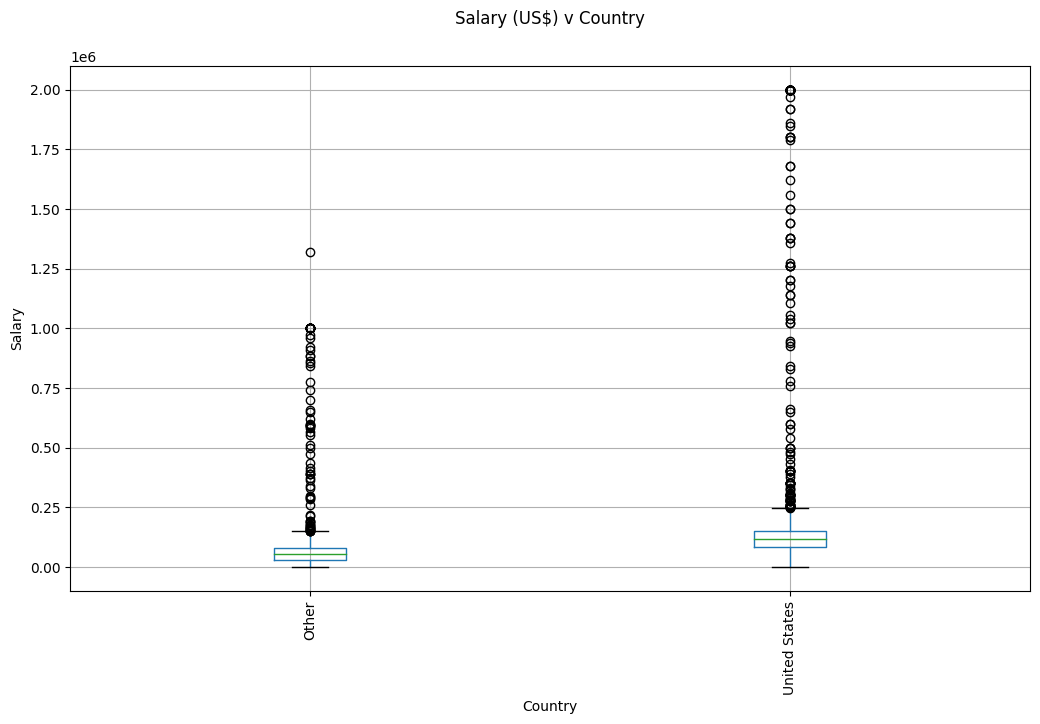

In [17]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [18]:
df

,Country,EdLevel,YearsCodePro,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,Other,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,Other,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Other,Some college/university study without earning ...,7,14268.0
12,Other,"Secondary school (e.g. American high school, G...",20,38916.0
...,...,...,...,...
5003,Other,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,20845.0
5004,United States,"Secondary school (e.g. American high school, G...",10,90000.0
5006,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",14,165000.0
5007,Other,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,37200.0


In [19]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '12', '10', '14', '29', '6',
       '28', '8', '23', '15', '25', 'Less than 1 year', '5', '9', '11',
       '21', '16', '18', '32', '19', '22', '38', '30', '26', '17', '27',
       '24', '33', '34', '35', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44'], dtype=object)

In [20]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)
#apply() method. This function acts as 
#a map() function in Python. It takes a function 
#as an input and applies this function
#to an entire DataFrame

In [21]:
df

,Country,EdLevel,YearsCodePro,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13.0,116000.0
9,Other,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4.0,32315.0
10,Other,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2.0,40070.0
11,Other,Some college/university study without earning ...,7.0,14268.0
12,Other,"Secondary school (e.g. American high school, G...",20.0,38916.0
...,...,...,...,...
5003,Other,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10.0,20845.0
5004,United States,"Secondary school (e.g. American high school, G...",10.0,90000.0
5006,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",14.0,165000.0
5007,Other,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14.0,37200.0


In [22]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [23]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [24]:
df

,Country,EdLevel,YearsCodePro,Salary
7,United States,Bachelor’s degree,13.0,116000.0
9,Other,Master’s degree,4.0,32315.0
10,Other,Bachelor’s degree,2.0,40070.0
11,Other,Less than a Bachelors,7.0,14268.0
12,Other,Less than a Bachelors,20.0,38916.0
...,...,...,...,...
5003,Other,Master’s degree,10.0,20845.0
5004,United States,Less than a Bachelors,10.0,90000.0
5006,United States,Bachelor’s degree,14.0,165000.0
5007,Other,Master’s degree,14.0,37200.0


In [25]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()#This approach is very simple and it involves converting each value in a column into a number
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_

#LabelEncoder can be used to normalize labels. 
#It can also be used to transform non-numerical labels to numerical labels. 
#Fit label encoder and return encoded labels.

array([0, 2, 1, 3])

In [27]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([1, 0])

In [28]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [29]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [30]:
y_pred = linear_reg.predict(X)

import matplotlib.pyplot as plt

# Predict target values for the input features using the trained model
y_pred = linear_reg.predict(X)

# Plot the predicted values against the actual target values
plt.scatter(y.values, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Model")
plt.show()


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [32]:
error

295208.9004833956

In [33]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [34]:
y_pred = dec_tree_reg.predict(X)
y_pred

array([270700.41666667,  73573.        ,  53972.05263158, ...,
       308908.28571429, 153787.5       , 212399.25      ])

In [35]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$286,347.53


In [36]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [37]:
y_pred = random_forest_reg.predict(X)

In [38]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$286,628.68


In [39]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [40]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$294,875.44


In [41]:
X

,Country,EdLevel,YearsCodePro
7,1,0,13.0
9,0,2,4.0
10,0,0,2.0
11,0,1,7.0
12,0,1,20.0
...,...,...,...
5003,0,2,10.0
5004,1,1,10.0
5006,1,0,14.0
5007,0,2,14.0


In [42]:
# country, edlevel, yearscode
X = np.array([["United States", 'Master’s degree', 15 ]])
X

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [43]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[ 1.,  2., 15.]])

In [44]:
y_pred = regressor.predict(X)
y_pred

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([227232.78610603])

In [45]:
import pickle

In [46]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [47]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [48]:
y_pred = regressor_loaded.predict(X)
y_pred

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([227232.78610603])

In [7]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
pip install pyngrok

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
%%writefile app.py
import streamlit as st
from predict_page import show_predict_page
from explore_page import show_explore_page


page = st.sidebar.selectbox("Explore Or Predict", ("Predict", "Explore"))

if page == "Predict":
    show_predict_page()
else:
    show_explore_page()

Writing app.py


In [6]:
!streamlit run app.py & npx localtunnel --port 8501

^C
